# Rigid and Flexible Anlysis
This notebook shows an example use case of pyslammer for running rigid, decoupled, and coupled sliding block analyses.

*The next steps assume you've already installed pySLAMMER from PYPI:*
```bash
    pip install pyslammer
```

In [16]:
%matplotlib widget


First, import pySLAMMER and a couple other helpful packages

In [17]:
import pyslammer as slam
import numpy as np
import matplotlib.pyplot as plt

Next define the ground motion to use in the analysis.
For this example, we will use one of pySLAMMER's built in ground motions from the 1995 Kobe earthquake.
This creates a ground motion object with `accel` and `dt` attributes with the acceleration array and timestep, respectively.

In [18]:
record_name = "Kobe_1995_TAK-090"
gm = slam.sample_ground_motions()[record_name]

## Rigid block analysis
A rigid block analysis requires at least three input parameters:
* `a_in` - the input acceleration time history (in units of g)  
* `dt` - the timestep separating the acceleration data points  
* `ky` - the slope's yield acceleration (in units of g)  

These parameters are stored in a dictionary (`rigid_inputs`) and used as kwarg input to the `RigidAnalysis` method.


In [19]:
rigid_inputs = {
    "a_in": gm.accel,
    "dt": gm.dt,
    "ky": 0.2
}

rigid_result = slam.RigidAnalysis(**rigid_inputs)

## Flexible sliding block analysis
The flexible block analyses (decoupled and coupled) require additional input parameters to define the stiffness of the model:
* `height` - the slope height (in meters, by default)
* `vs_slope` - the slope shear wave velocity  (in meters per second, by default)
* `vs_base` - the base shear wave velocity (in meters per second, by default)
* `damp_ratio` - the slope damping ratio
* `ref_strain` - the slope reference strain
* `soil_model` - the dynamic analysis method used (either `linear_elastic` or `equivalent_linear`)


These parameters are stored in a dictionary (`flexible_inputs`) and used as kwargs along with those used in the rigid analysis.
The decoupled and coupled analyses are run with the `Decoupled` and `Coupled` methods, respectively.

In [20]:
flexible_inputs = {
    "height": 50.0,
    "vs_slope": 600.0,
    "vs_base": 600.0,
    "damp_ratio": 0.05,
    "ref_strain": 0.0005,
    "soil_model": "equivalent_linear"
}

decoupled_result = slam.Decoupled(**rigid_inputs,**flexible_inputs)
decoupled_result.tbd()
coupled_result = slam.Coupled(**rigid_inputs,**flexible_inputs)
coupled_result.tbd()

## Comparison of analysis methods
A simple plot comparing the block displecements with time can be generated by accessing the `.sliding_disp` attribute of each analysis result.

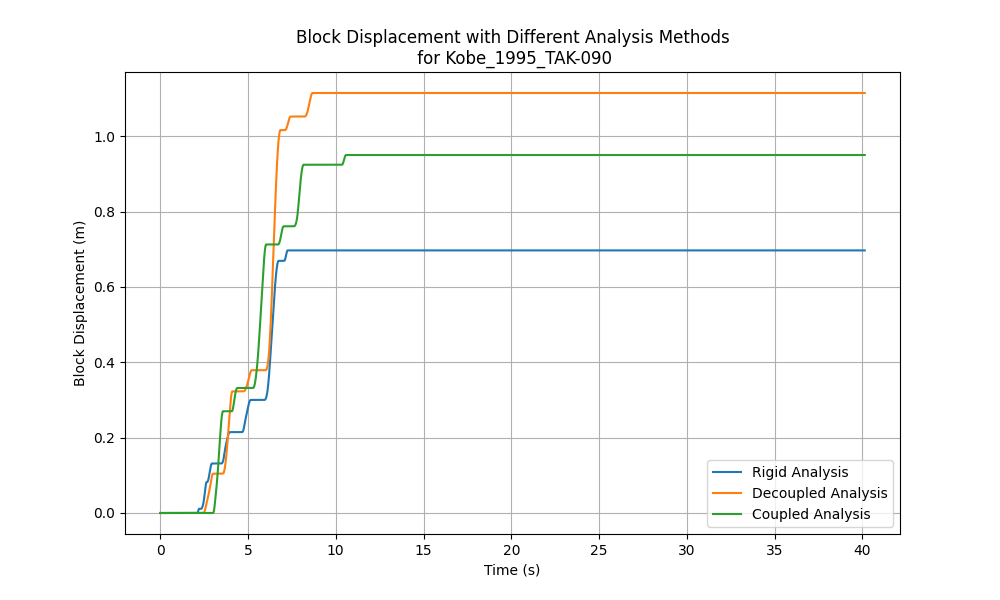

In [21]:
plt.figure(figsize=(10, 6))

time = np.arange(0, len(gm.accel) * gm.dt, gm.dt)

# Plot block displacement vs time for each analysis method
plt.plot(time, rigid_result.sliding_disp, label='Rigid Analysis')
plt.plot(time, decoupled_result.sliding_disp, label='Decoupled Analysis')
plt.plot(time, coupled_result.sliding_disp, label='Coupled Analysis')

# Add labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Block Displacement (m)')
plt.title(f'Block Displacement with Different Analysis Methods\n for {record_name}')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()